# Ecualización localizada del histograma

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
%load_ext autoreload
%autoreload 2

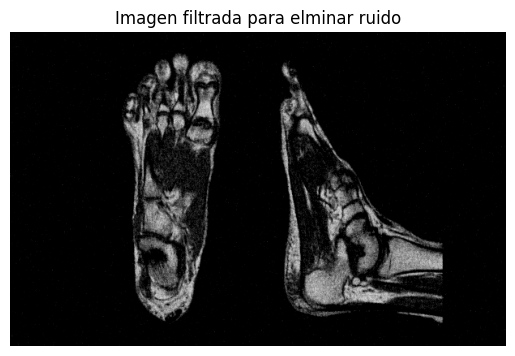

In [8]:
raw_img = cv2.imread('filtered_img/Pie-fourier.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(raw_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagen filtrada para eliminar ruido')
plt.show()

## Ecualizacioń global

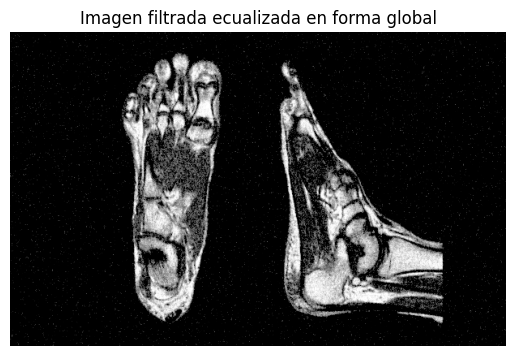

In [9]:
img_eq_glob = cv2.equalizeHist(raw_img)
plt.imshow(img_eq_glob, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagen filtrada ecualizada en forma global')
plt.show()

Podemos apreciar que esta ecualización dio lugar a cierto ruido de "sal y pimienta". Vamos a eliminarlo con un filtro de mediana

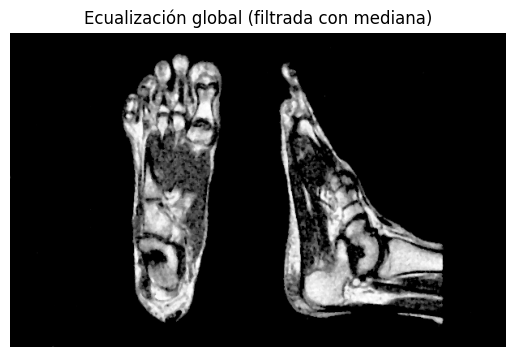

In [11]:
img_eq_glob_syp = cv2.medianBlur(img_eq_glob, 3)
plt.imshow(img_eq_glob_syp, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Ecualización global (filtrada con mediana)')
plt.show()

## Ecualización local

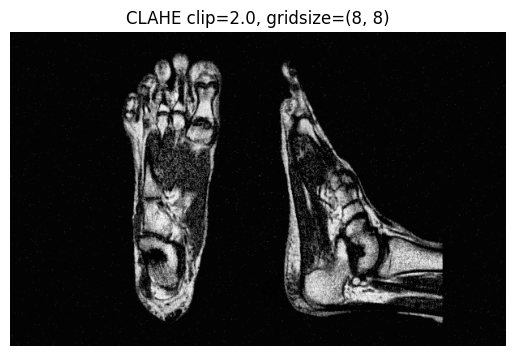

In [17]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(raw_img)
# img_clahe_syp = cv2.medianBlur(img_clahe, 3)
plt.imshow(img_clahe, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('CLAHE clip=2.0, gridsize=(8, 8)')
plt.show()

Vamos a probar distintas combinaciones de clip y gridsize

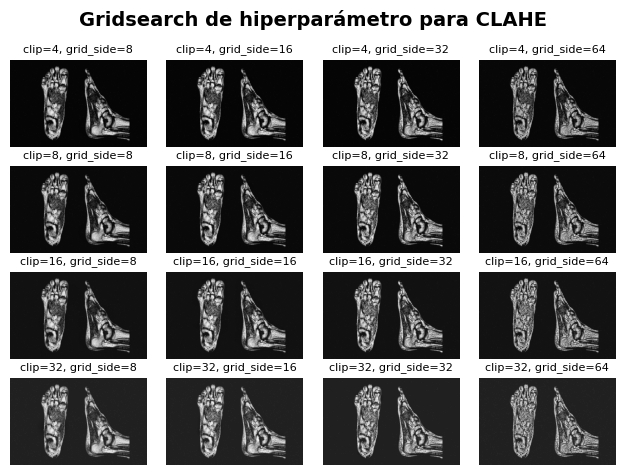

In [30]:
cliplimits = [2**i for i in range(2, 6)]
grid_sides = [2**i for i in range(3, 7)]

fig, axs = plt.subplots(nrows=len(cliplimits), ncols=len(grid_sides))

for i, clip in enumerate(cliplimits):
    for j, grid_side in enumerate(grid_sides):
        clahe = cv2.createCLAHE(clipLimit=clip, tileGridSize=(grid_side, grid_side))
        img_clahe = clahe.apply(raw_img)
        axs[i, j].imshow(img_clahe, cmap='gray', vmin=0, vmax=255)
        axs[i, j].axis('off')
        axs[i, j].set_title(f'{clip=}, {grid_side=}', fontsize=8)

fig.suptitle('Gridsearch de hiperparámetro para CLAHE', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()